# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

## 1. Import biblioteci

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Setări pentru afișare
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Stil vizualizări
sns.set(style="whitegrid")

## 2. Încărcarea setului de date

In [5]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
28599,31,Private,176969,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
8688,38,Private,354739,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,36,Philippines,>50K
8746,47,Private,183522,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Black,Female,0,0,40,United-States,>50K
29514,35,Private,290226,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
26864,17,Private,238628,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,5,United-States,<=50K
21365,30,Private,78530,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3786,33,Self-emp-inc,117963,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,60,United-States,>50K
7805,31,Private,217460,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
29745,52,Private,195638,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,45,United-States,<=50K
14778,37,Private,188377,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,0,40,United-States,<=50K


## 3. Dimensiunea și structura setului de date

In [9]:
# Dimensiunea datasetului
data.shape
# Informații despre tipurile de date și valori lipsă
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 4. Statistici descriptive

Sunt calculate statistici descriptive pentru variabilele numerice:
medie, mediană, deviație standard, min și max.

In [10]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 5. Analiza valorilor lipsă

Este identificat numărul și procentul valorilor lipsă pentru fiecare coloană.

In [12]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing_count,
    "Percentage (%)": missing_percent
})

missing_df[missing_df["Missing Values"] > 0]

,Missing Values,Percentage (%)


**Observație:**  
Nu au fost identificate valori lipsă în dataset după procesul de încărcare.
Valorile lipsă marcate inițial cu `" ?"` au fost tratate la citirea datelor.

## 6. Distribuția variabilei țintă: hours-per-week

Se analizează distribuția numărului de ore lucrate pe săptămână folosind histogramă și boxplot.


### Distribuția variabilei țintă: *hours-per-week* (Histograma)

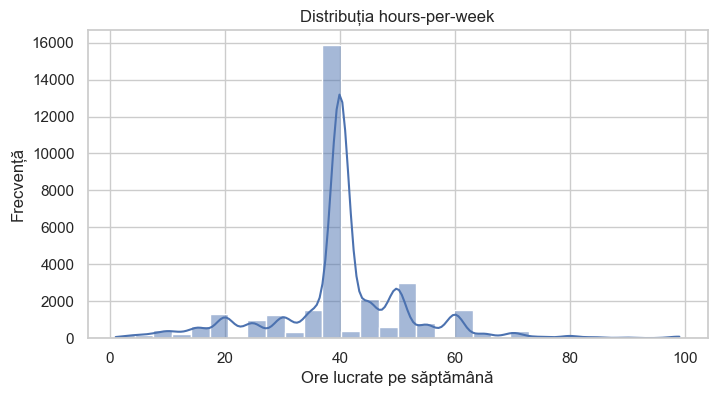

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(data["hours-per-week"], bins=30, kde=True)
plt.title("Distribuția hours-per-week")
plt.xlabel("Ore lucrate pe săptămână")
plt.ylabel("Frecvență")
plt.show()

**Interpretare:**  
Distribuția variabilei *hours-per-week* este puternic concentrată în jurul valorii de 40 de ore pe săptămână,
ceea ce indică un program de lucru standard pentru majoritatea indivizilor.
Distribuția este asimetrică spre dreapta, existând un număr redus de persoane care raportează un număr
semnificativ mai mare de ore lucrate (peste 60–80 de ore pe săptămână).

### Identificarea valorilor extreme pentru *hours-per-week* (Boxplot)


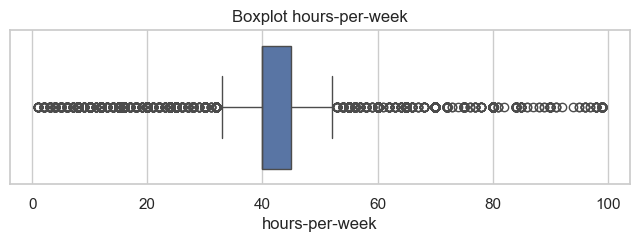

In [15]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot hours-per-week")
plt.show()

**Interpretare:**  
Boxplot-ul confirmă prezența mai multor valori extreme, în special în partea superioară a distribuției,
corespunzătoare persoanelor care lucrează un număr foarte mare de ore pe săptămână.
Deși aceste valori pot fi considerate outliers din punct de vedere statistic,
ele sunt plauzibile din punct de vedere social și economic și nu sunt eliminate în etapa de EDA.


### Distribuția avansată a orelor lucrate (Violin Plot)


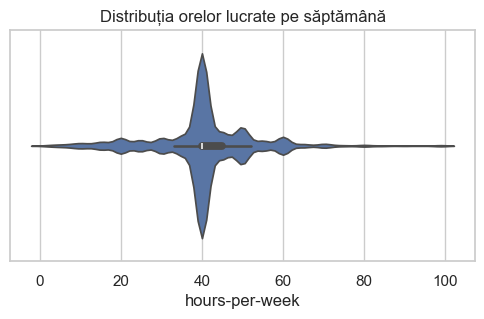

In [25]:
plt.figure(figsize=(6,3))
sns.violinplot(x=data["hours-per-week"])
plt.title("Distribuția orelor lucrate pe săptămână")
plt.show()


Violin plot-ul confirmă observațiile anterioare, evidențiind o distribuție
asimetrică spre dreapta, cu o concentrație mare în jurul valorii de 40 de ore
și o coadă lungă corespunzătoare persoanelor care lucrează semnificativ mai mult.


## 7. Identificarea outlierilor

Sunt utilizate boxplot-uri pentru a identifica outlieri în variabile numerice selectate.

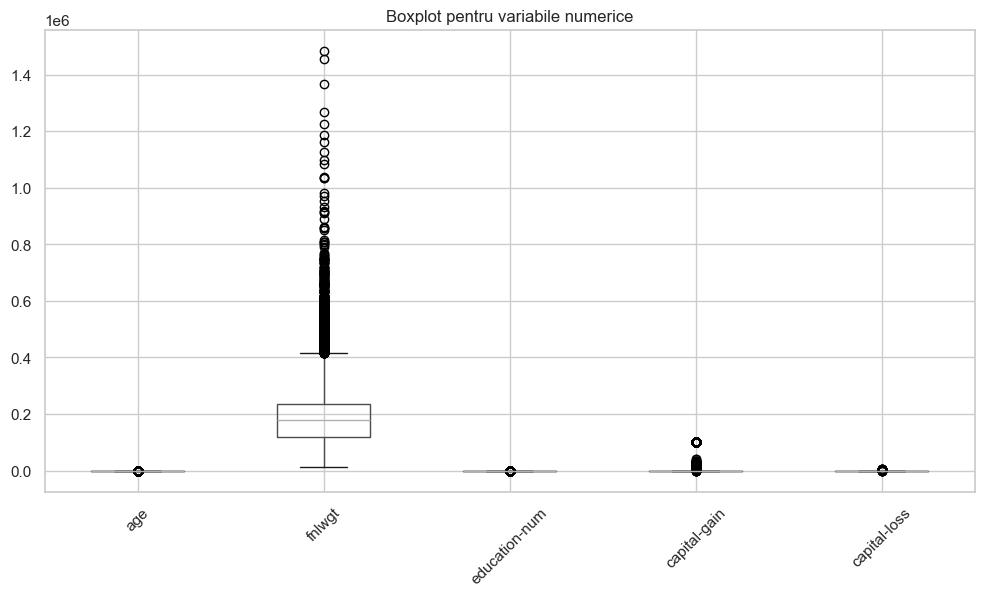

In [26]:
numeric_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss"]

plt.figure(figsize=(12, 6))
data[numeric_cols].boxplot(rot=45)
plt.title("Boxplot pentru variabile numerice")
plt.show()

**Interpretare:**  
Boxplot-urile evidențiază diferențe semnificative între distribuțiile variabilelor numerice.
Variabila *fnlwgt* prezintă un număr foarte mare de valori extreme,
indicând o distribuție puternic asimetrică, specifică ponderilor de eșantionare.
Variabilele *capital-gain* și *capital-loss* sunt caracterizate de o concentrație mare de valori zero,
cu câteva observații extreme pozitive, ceea ce sugerează distribuții extrem de dezechilibrate.
În schimb, variabilele *age* și *education-num* au distribuții mai compacte,
cu mai puține valori atipice.
Aceste observații sunt importante pentru etapele ulterioare de preprocesare și modelare.


## 8. Analiza variabilelor categorice

### Analiza orelor lucrate pe categorii de program

Pentru o interpretare mai clară, variabila hours-per-week este
grupată în categorii care reflectă tipuri de program de muncă.

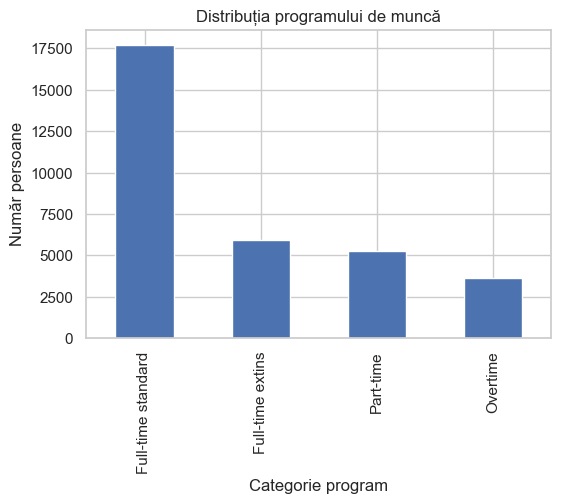

In [19]:
# Creăm categorii pentru orele lucrate
data["work_hours_category"] = pd.cut(
    data["hours-per-week"],
    bins=[0, 30, 40, 50, 100],
    labels=["Part-time", "Full-time standard", "Full-time extins", "Overtime"]
)

# Distribuția categoriilor
plt.figure(figsize=(6,4))
data["work_hours_category"].value_counts().plot(kind="bar")
plt.title("Distribuția programului de muncă")
plt.xlabel("Categorie program")
plt.ylabel("Număr persoane")
plt.show()


**Interpretare:**  
Majoritatea persoanelor se încadrează în categoria de program
full-time standard (aproximativ 40 de ore). Un număr mai mic
lucrează part-time sau peste program, ceea ce indică o distribuție
relativ concentrată în jurul normei clasice de muncă.

### Ore lucrate în funcție de nivelul de venit

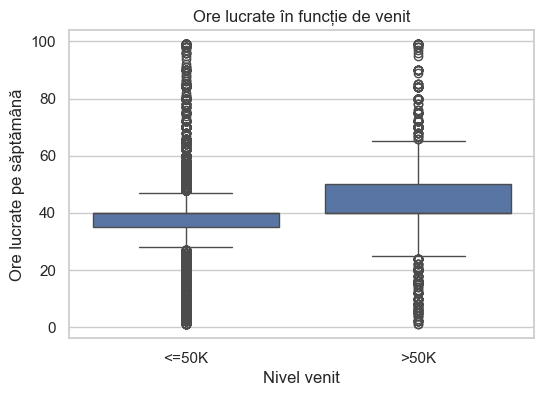

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["income"], y=data["hours-per-week"])
plt.title("Ore lucrate în funcție de venit")
plt.xlabel("Nivel venit")
plt.ylabel("Ore lucrate pe săptămână")
plt.show()

**Interpretare:**  
Persoanele cu venituri mai ridicate prezintă o mediană ușor mai mare
a orelor lucrate și o variabilitate mai mare, sugerând că numărul
de ore lucrate ar putea fi un factor asociat cu nivelul de venit.


### Orele lucrate în funcție de tipul de muncă (workclass)

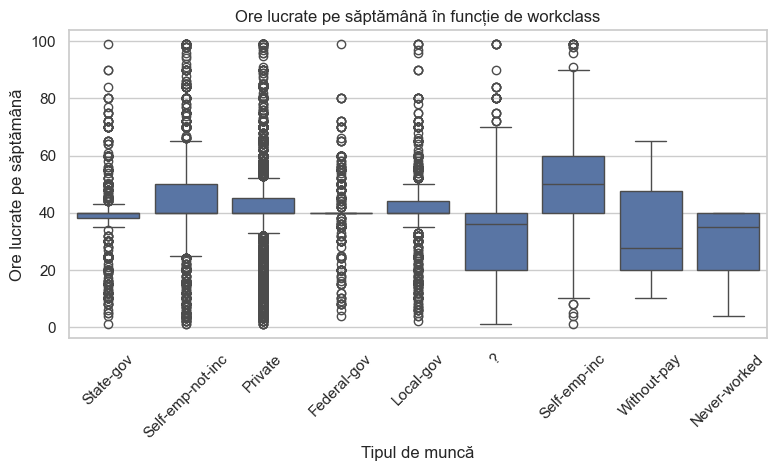

In [27]:
plt.figure(figsize=(9,4))
sns.boxplot(
    x=data["workclass"],
    y=data["hours-per-week"]
)
plt.xticks(rotation=45)
plt.title("Ore lucrate pe săptămână în funcție de workclass")
plt.xlabel("Tipul de muncă")
plt.ylabel("Ore lucrate pe săptămână")
plt.show()


**Interpretare:**  
Diferențele dintre categoriile *workclass* sugerează că tipul de muncă influențează
numărul de ore lucrate. Anumite categorii prezintă o variabilitate mai mare și mai
mulți outlieri, ceea ce indică programe de lucru mai puțin standardizate.

## 9. Analiza corelațiilor cu variabila țintă (hours-per-week)

În această secțiune este analizată relația dintre variabila țintă *hours-per-week* și
celelate variabile numerice pentru a identifica potențiali predictori relevanți
pentru modelele de regresie.


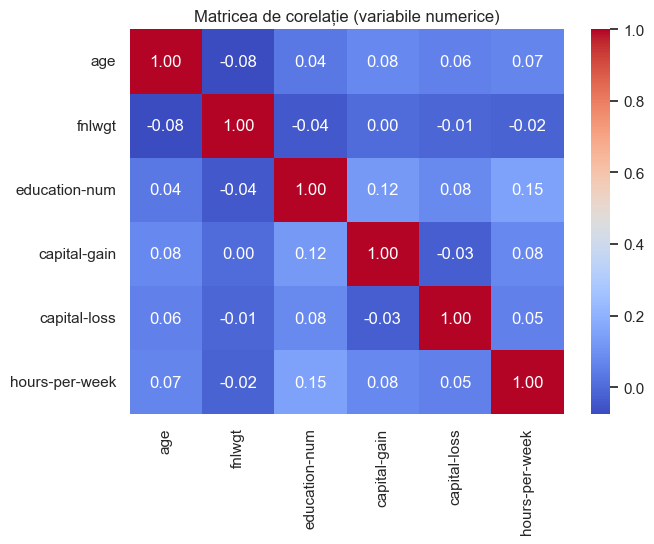

In [22]:
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

corr_matrix = data[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de corelație (variabile numerice)")
plt.show()


**Interpretare:**  
Se observă că variabilele numerice prezintă corelații relativ slabe cu
*hours-per-week*. Cea mai ridicată corelație apare pentru *education-num*,
ceea ce sugerează că nivelul educației poate avea o influență moderată asupra
numărului de ore lucrate. Totuși, valorile reduse indică faptul că relațiile
nu sunt strict liniare și pot necesita modele mai complexe.

## 10. Relația dintre nivelul educației și orele lucrate

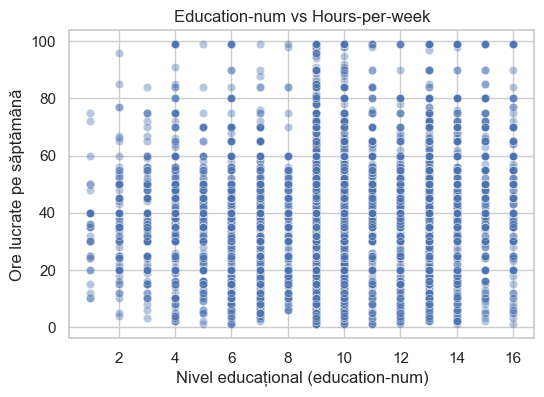

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=data["education-num"],
    y=data["hours-per-week"],
    alpha=0.4
)
plt.title("Education-num vs Hours-per-week")
plt.xlabel("Nivel educațional (education-num)")
plt.ylabel("Ore lucrate pe săptămână")
plt.show()


**Interpretare:**  
Graficul arată o dispersie ridicată a valorilor, ceea ce indică o relație slabă,
dar pozitivă între nivelul educației și orele lucrate. Pentru valori mai mari ale
educației, se observă o ușoară tendință de creștere a numărului de ore lucrate,
însă variația rămâne mare.

## 11. Concluzii

Analiza exploratorie a setului de date Census a evidențiat faptul că variabila
țintă **hours-per-week** este puternic concentrată în jurul valorii de 40 de ore,
corespunzătoare unui program standard de lucru. Distribuția este asimetrică spre
dreapta, indicând existența unui număr redus de persoane care lucrează un volum
ridicat de ore săptămânal.

Analiza corelațiilor arată că relațiile dintre orele lucrate și variabilele
numerice sunt în general slabe, cea mai ridicată corelație fiind observată pentru
**education-num**, fără a indica însă o relație liniară puternică.

Analizele pe variabile categorice (income, workclass) sugerează diferențe între
grupuri în ceea ce privește distribuția orelor lucrate, dar cu o variabilitate
ridicată și numeroși outlieri. Aceste rezultate indică faptul că relațiile dintre
orele lucrate și caracteristicile socio-economice sunt complexe și pot necesita
modele mai avansate în etapa de modelare.

## 12. EDA pe setul de date preprocesat (Task 1) – Analiză comparativă

În această secțiune se repetă o parte din analiza exploratorie, utilizând setul de date
preprocesat obținut în Task 1, pentru a observa diferențele definite de pașii de
curățare, scalare și codificare.

In [30]:
# Încărcarea setului de date preprocesat (Task 1)
preprocessed_df = pd.read_csv("preprocessed_train_task1.csv")

preprocessed_df.shape, preprocessed_df.head()

((26029, 111),
    num__age  num__fnlwgt  num__education-num  num__capital-gain  num__capital-loss  num__capital_total  \
 0 -0.188070    -0.627661           -0.458342                0.0                0.0                 0.0   
 1  0.992956    -0.768050           -0.458342                0.0                0.0                 0.0   
 2 -0.335699     0.237442           -0.051335                0.0                0.0                 0.0   
 3  1.140584    -0.041966           -0.458342                0.0                0.0                 0.0   
 4 -0.630955    -1.093903           -0.458342                0.0                0.0                 0.0   
 
    num__experience_estimate  num__has_capital  cat__workclass_?  cat__workclass_Federal-gov  cat__workclass_Local-gov  \
 0                 -0.189256               0.0               0.0                         0.0                       0.0   
 1                  0.993455               0.0               0.0                         0.0     

### Distribuția variabilei țintă (preprocesat)

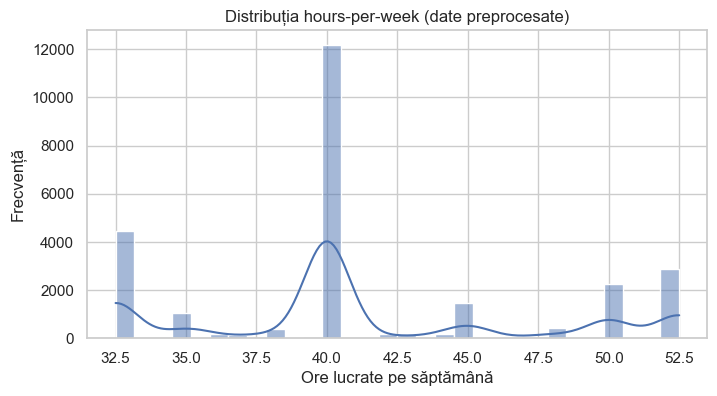

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(preprocessed_df["hours-per-week"], bins=30, kde=True)
plt.title("Distribuția hours-per-week (date preprocesate)")
plt.xlabel("Ore lucrate pe săptămână")
plt.ylabel("Frecvență")
plt.show()


**Interpretare:**  
Distribuția variabilei țintă în setul preprocesat păstrează forma generală observată
în datele brute, cu o concentrare în jurul valorii de 40 de ore pe săptămână.
Diferențele minore apar ca rezultat al eliminării valorilor lipsă și al transformărilor
aplicate în etapa de preprocesare.

### Boxplot comparativ

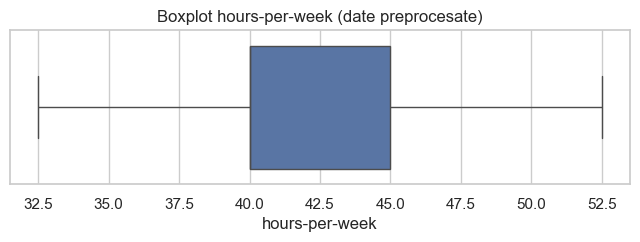

In [33]:
plt.figure(figsize=(8,2))
sns.boxplot(x=preprocessed_df["hours-per-week"])
plt.title("Boxplot hours-per-week (date preprocesate)")
plt.show()

**Interpretare:**  
Numărul de valori extreme rămâne relativ ridicat, ceea ce sugerează că preprocesarea
nu a eliminat observațiile valide din punct de vedere socio-economic, ci doar a
standardizat reprezentarea acestora pentru modelare.

### Corelații după preprocesare

Inițial, analiza corelațiilor a fost explorată prin intermediul unei matrice de corelație vizualizate cu ajutorul unui heatmap. 
În cazul setului de date preprocesat, care conține un număr mare de variabile obținute prin codificare, această metodă s-a dovedit dificil de interpretat din cauza aglomerării vizuale și a numărului ridicat de corelații apropiate de zero.

Pentru a obține o interpretare mai clară și mai relevantă, analiza a fost reorientată către examinarea corelațiilor individuale dintre variabilele explicative și variabila țintă *hours-per-week*, prin ordonarea coeficienților de corelație în funcție de magnitudine, mod prin care sunt identificate cele mai relevante relații pozitive și negative, evitând supraîncărcarea vizuală.


In [36]:
# Corelația fiecărei coloane cu variabila țintă (hours-per-week)
target_col = "hours-per-week"

corr_with_target = preprocessed_df.corr(numeric_only=True)[target_col].sort_values(ascending=False)

# Top corelații pozitive / negative (ignorăm 1.0 cu el însuși)
top_pos = corr_with_target.drop(target_col).head(10)
top_neg = corr_with_target.drop(target_col).tail(10)

display(pd.DataFrame({"Top corelații pozitive": top_pos}))
display(pd.DataFrame({"Top corelații negative": top_neg}))


,Top corelații pozitive
cat__relationship_Husband,0.279058
cat__sex_Male,0.255482
cat__marital-status_Married-civ-spouse,0.241700
num__education-num,0.182429
cat__occupation_Exec-managerial,0.170524
cat__workclass_Self-emp-inc,0.142845
cat__education_Bachelors,0.101388
cat__workclass_Self-emp-not-inc,0.100159
num__age,0.095614
num__experience_estimate,0.094633


,Top corelații negative
cat__workclass_?,-0.147479
cat__occupation_?,-0.147739
cat__occupation_Other-service,-0.179243
cat__marital-status_Never-married,-0.208297
cat__relationship_Own-child,-0.247110
cat__sex_Female,-0.255482
num__capital-gain,NaN
num__capital-loss,NaN
num__capital_total,NaN
num__has_capital,NaN


### Interpretare (corelații după preprocessare)

Analiza corelațiilor cu variabila țintă `hours-per-week` arată că cele mai mari valori (pozitive și negative) sunt de magnitudine moderată, ceea ce indică absența unor relații liniare foarte puternice.

Corelațiile pozitive sugerează că:
- anumite caracteristici socio-demografice (ex. relația de tip *Husband*, sex masculin, nivel educațional mai ridicat) sunt asociate cu un număr mai mare de ore lucrate pe săptămână;
- variabilele legate de educație și statut profesional au o influență mai vizibilă decât variabilele strict demografice precum vârsta.

Corelațiile negative indică faptul că:
- anumite categorii (ex. *Never-married*, *Own-child*, sex feminin) sunt asociate cu un număr mai mic de ore lucrate;
- valorile lipsă sau necunoscute (`?`) tind să fie asociate negativ cu orele lucrate, posibil reflectând situații ocupaționale instabile.

Rezultatele confirmă că relația dintre variabilele explicative și `hours-per-week` este complexă și probabil neliniară, ceea ce justifică utilizarea unor modele mai flexibile în etapele următoare.

## Concluzii generale EDA

Analiza exploratorie a evidențiat o distribuție clară a variabilei țintă în jurul
programului standard de lucru, precum și existența unor relații slabe, dar consistente,
între hours-per-week și variabile precum nivelul educațional sau venitul.

Analiza pe datele preprocesate confirmă faptul că pașii din Task 1 păstrează structura
informațională a datasetului, pregătind datele pentru etapa de modelare fără a
distorsiona relațiile esențiale dintre variabile.